In [1]:
import cv2
import numpy as np

print cv2


import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

from labelme_parser2 import parse_labelme2_xml

<module 'cv2' from '/lab/opencv/opencv-3-master/install/lib/python2.7/dist-packages/cv2.so'>


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
cv2.__version__

'3.1.0-dev'

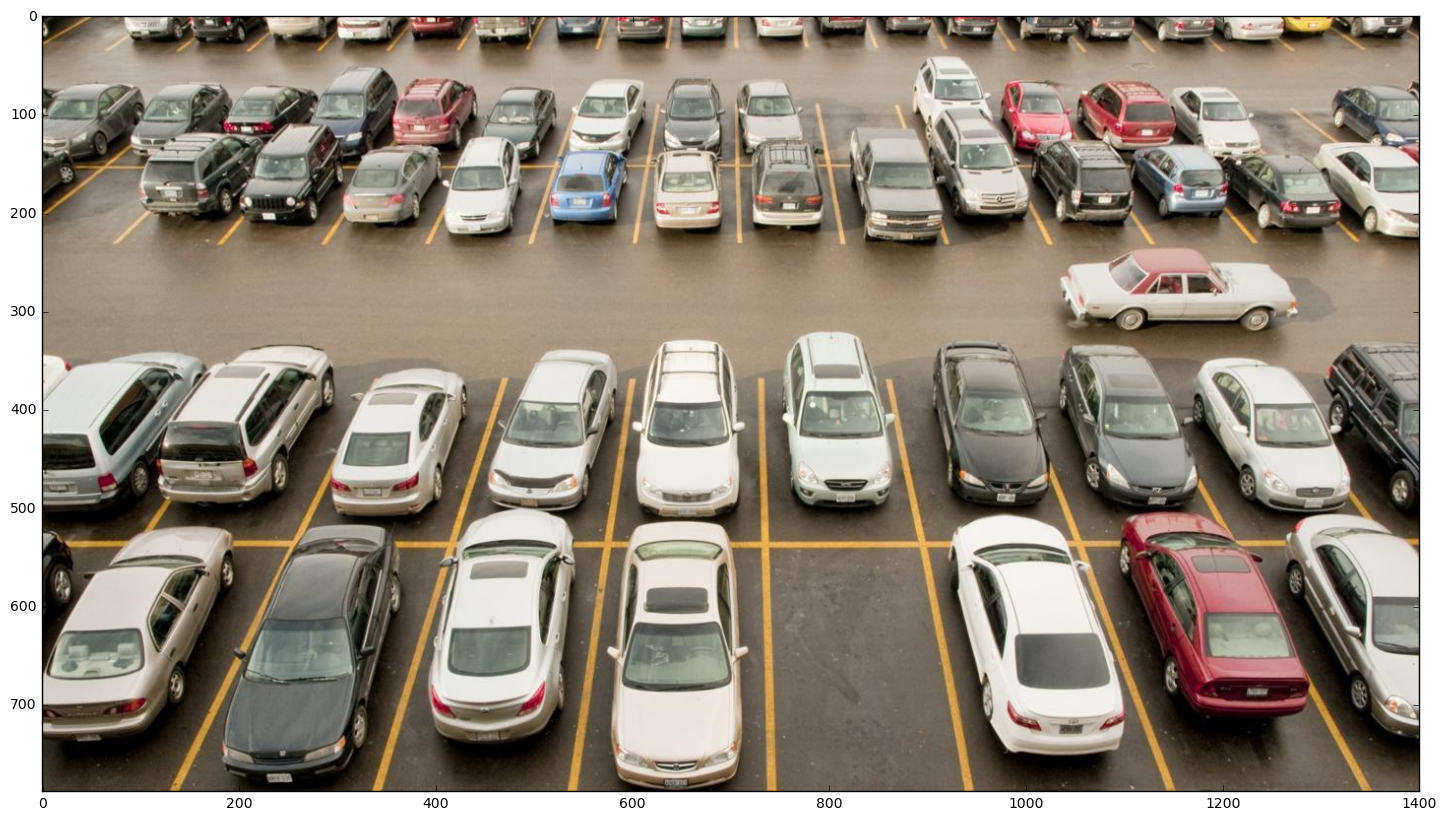

In [3]:
parking_lot_img = cv2.imread("parking_space_1.jpg")
parking_lot_img = cv2.cvtColor(parking_lot_img,cv2.COLOR_BGR2RGB)
rcParams['figure.figsize'] = 20, 10
plt.imshow(parking_lot_img)

In [4]:
labelme2_parking_markup = open('parking_space_1.xml', 'r').read()
parking_markup_data = parse_labelme2_xml(labelme2_parking_markup)

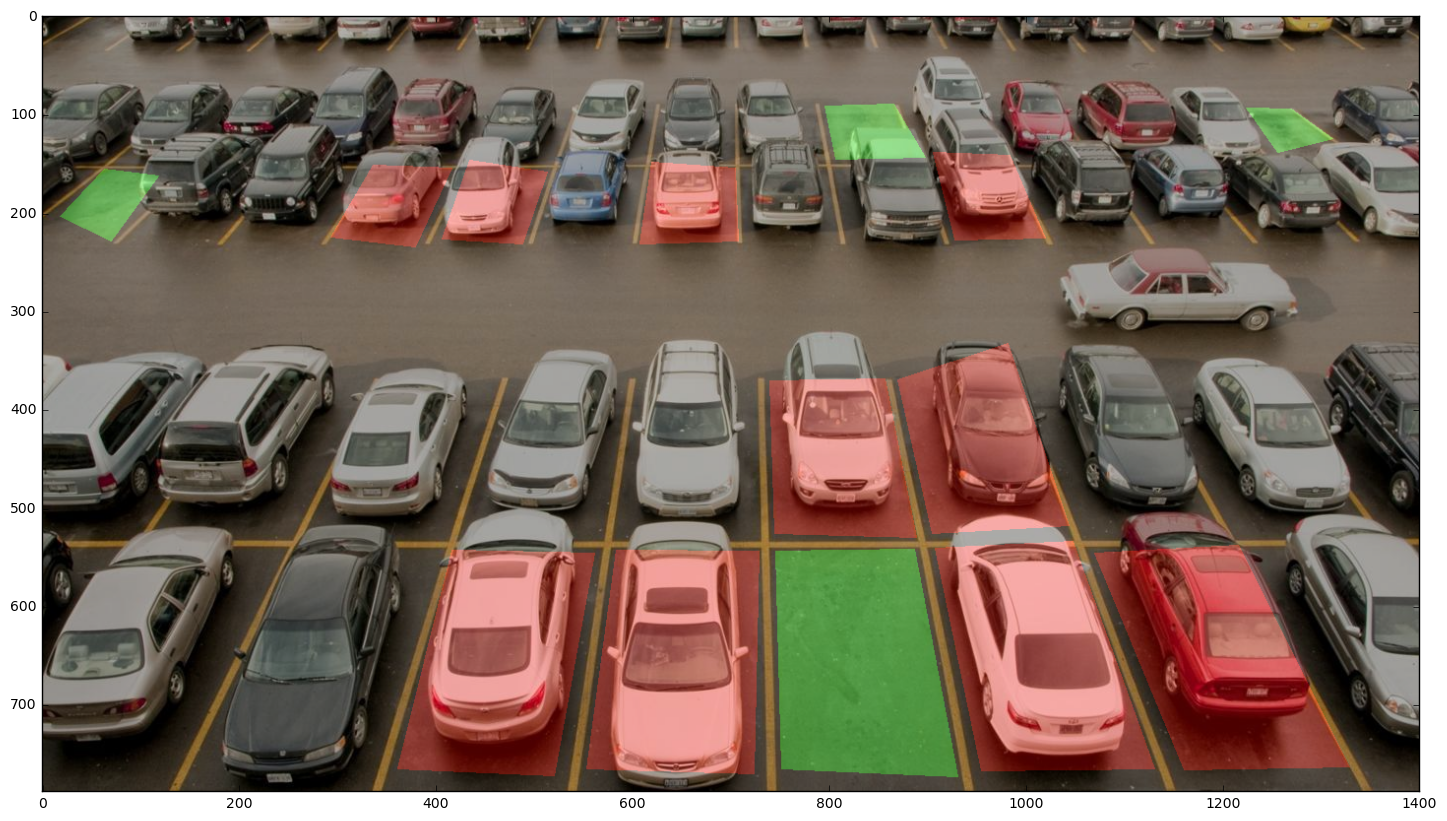

In [5]:
blank_image = np.zeros(parking_lot_img.shape, np.uint8)
for lot in parking_markup_data:
    is_empty = (lot["status"] == "free")
    vertices = lot["parkingSlotLocation"]["points"]
    polygon = cv2.convexHull(np.array(vertices))
    #green for free
    #red for occupied
    cv2.fillPoly(blank_image, [polygon], (0, 255, 0) if is_empty else (255,0,0))

parking_lot_markup_img = cv2.addWeighted(parking_lot_img, 0.7, blank_image, 0.3, 0)
plt.imshow(parking_lot_markup_img)

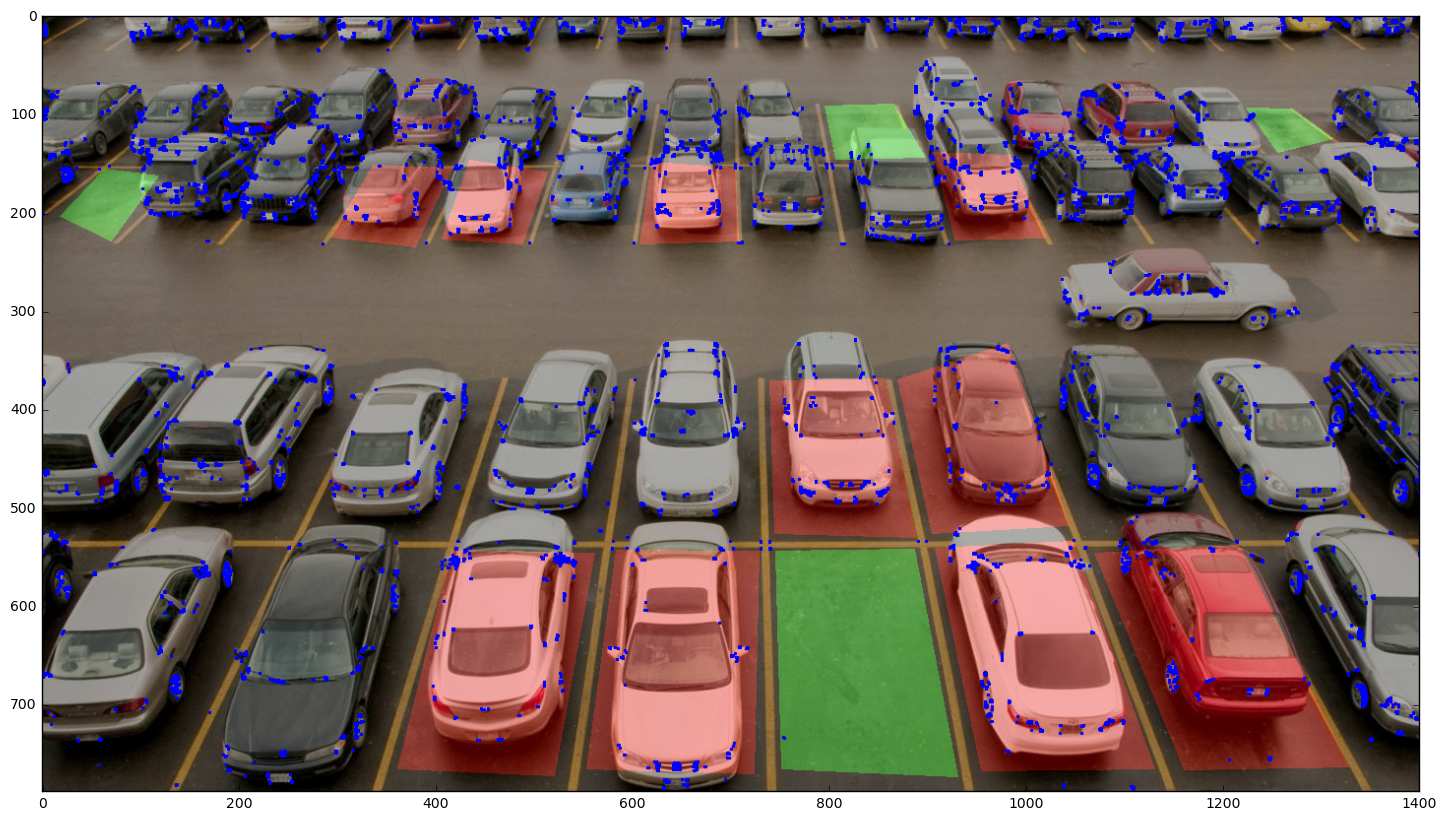

In [6]:
parking_lot_img_gray = cv2.cvtColor(parking_lot_img,cv2.COLOR_BGR2GRAY)
parking_lot_img_gray = np.float32(parking_lot_img_gray)

dst = cv2.cornerHarris(parking_lot_img_gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
parking_lot_markup_img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(parking_lot_markup_img)